## Observations and Insights 

In [117]:
#Observations:
#Higher mouse weight appears to be correlated with greater tumor volume.
#Capomulin and Ramicane seem to be the most effective.
#

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Check the number of mice.
mouse_count = merge_data["Mouse ID"].nunique()
mouse_count

249

In [39]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merge_data[merge_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = merge_data
clean_data = clean_data.set_index("Mouse ID")
clean_data = clean_data.drop(duplicate["Mouse ID"])
clean_data = clean_data.reset_index()

clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Check the number of mice in the clean DataFrame.
clean_count = clean_data["Mouse ID"].nunique()
clean_count


248

## Summary Statistics

In [42]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = round(clean_data["Tumor Volume (mm3)"].mean(), 2)
tumor_median = round(clean_data["Tumor Volume (mm3)"].median(), 2)
tumor_variance = round(clean_data["Tumor Volume (mm3)"].var(), 2)
tumor_std = round(clean_data["Tumor Volume (mm3)"].std(), 2)
tumor_sem = round(clean_data["Tumor Volume (mm3)"].sem(), 2)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_stats = pd.DataFrame({"Mean": [tumor_mean], 
                            "Median": [tumor_median],
                           "Variance": [tumor_variance],
                           "Standard Deviation": [tumor_std],
                           "Standard Error": [tumor_sem]})
tumor_stats


,Mean,Median,Variance,Standard Deviation,Standard Error
0,50.44,48.93,79.46,8.91,0.21


## Bar and Pie Charts

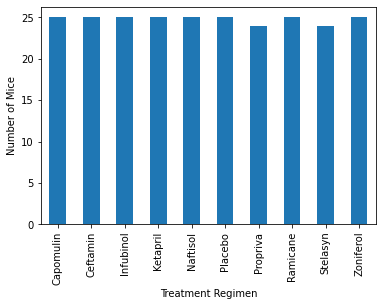

In [44]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

mice_regimen = clean_data[["Mouse ID", "Drug Regimen"]].drop_duplicates()
regimen_group = mice_regimen.groupby("Drug Regimen").count()["Mouse ID"]
regimen_group.plot(kind="bar")
#plt.title("Mice Per Trial")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Mice")
plt.show()


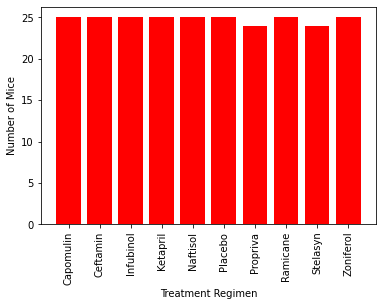

In [46]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

x_axis = np.arange(len(regimen_group))
tick_locations = [value for value in x_axis]
plt.bar(regimen_group.index, regimen_group, color='r')
plt.xticks(rotation="vertical")
#plt.title("Mice Per Trial")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Mice")
plt.show()


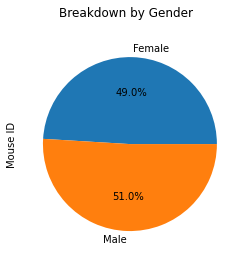

In [47]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
gender_data = clean_data[["Mouse ID", "Sex"]]
gender_group = gender_data.groupby("Sex").count()["Mouse ID"]
panda_pie = gender_group.plot.pie(subplots=True, figsize=(4, 4), title="Breakdown by Gender", autopct='%1.1f%%')
plt.show()



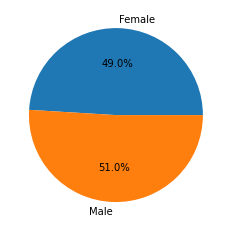

In [49]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
gender_data = clean_data[["Mouse ID", "Sex"]]
gender_group = gender_data.groupby("Sex").count()["Mouse ID"]
gender_labels = ('Female', 'Male')
#plt.title = ('Breakdown by Gender')
pyplot_pie_plot = plt.pie(gender_group, labels=gender_labels, autopct='%1.1f%%')



plt.show()


## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
time_data = clean_data[["Mouse ID", "Timepoint"]]
last_tp = time_data.groupby("Mouse ID").max()["Timepoint"]
last_tp = last_tp.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#clean_data2 = pd.merge(last_tp, clean_data, on="Mouse ID", how="left")
clean_data2 = pd.merge(last_tp[["Mouse ID", "Timepoint"]], clean_data, on=["Mouse ID", "Timepoint"], how="left")
                            
clean_data2



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [72]:


# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
for x in drug_list:
    drug_data = clean_data2.loc[clean_data2["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    tumor_vol_list.append(drug_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug_data.quantile([.25, .5, .75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    print(f"{x} potential outliers: {drug_data.loc[(drug_data< lower_bound) | (drug_data> upper_bound)]}")
   
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Generate a box plot of the final tumor volume of each mouse across four regimens of interest


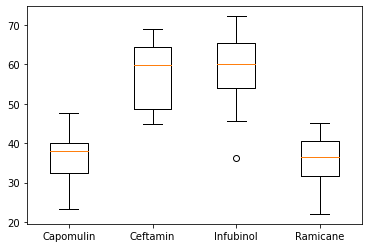

In [73]:
plt.boxplot(tumor_vol_list, labels=drug_list)
plt.show()

In [80]:
clean_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Line and Scatter Plots

TypeError: 'str' object is not callable

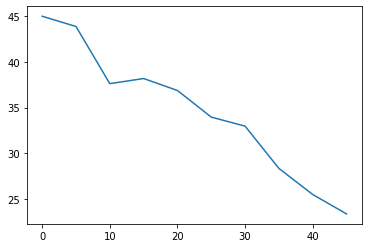

In [120]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
s185 = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"])
plt.title("Mouse S185 Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



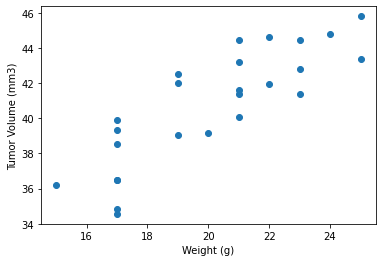

In [116]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
tumor_mean = capomulin_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
weight_mean = capomulin_data.groupby("Mouse ID").mean()["Weight (g)"]
plt.scatter(weight_mean, tumor_mean)
#plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
corr_coefficient = round(st.pearsonr(weight_mean,tumor_mean)[0],2)
plt.scatter(weight_mean, tumor_mean)

#plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


NameError: name 'slope' is not defined